## Introduction

The client is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Problem Statement

The data in it's raw form doesn't offer much insights of what factors are driving the business. Let's dig and dive into the data , clean it and transform it and bring it to the suitable format so that we can conduct various statistical tests that provide better insights of the factors affecting the business. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('delhivery_data.txt')

In [3]:
data.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.shape

(144867, 24)

In [6]:
# Dropping complete row duplicates
data.drop_duplicates(keep=False, inplace=True)

In [7]:
data.shape

(144867, 24)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


## Missing Values Treatment

In [10]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

- Since we have source_id and destination_id having missing values in the names is ok, since we anyhow group the data based on the id and not based on the name

### Creating New Features

- Before grouping the rows,let's see if we can make new features so that even they can be aggregated while grouping by

#### Creating Difference in start to end time in minutes

In [11]:
#converting to datetime
data['od_end_time'] = pd.to_datetime(data['od_end_time'])
data['od_start_time'] = pd.to_datetime(data['od_start_time'])

In [12]:
# Creating a new column which is a difference of od_start_time & od_end_time in minutes
data['diff_start_end'] = round((data['od_end_time'] - data['od_start_time']  ).dt.total_seconds() / 60,2)

#### Source State & Destination State

In [13]:
import re
pattern = re.compile('\([A-Za-z]*[\s\S]*[A-Za-z]*\)')

In [14]:
# extracting source state from source_name
data['source_state'] = data['source_name'].apply(lambda x : np.nan if pd.isnull(x)
                                                           else pattern.search(x).group()[1:-1])

In [15]:
# extracting destination state from destination_name
data['destination_state'] = data['destination_name'].apply(lambda x : np.nan if pd.isnull(x)
                                                           else pattern.search(x).group()[1:-1])

#### Extracting year,month & day of trip creation

In [16]:
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])

In [17]:
data['trip_year'] = data['trip_creation_time'].dt.year

In [18]:
data['trip_month'] = data['trip_creation_time'].dt.month

In [19]:
data['trip_day'] = data['trip_creation_time'].dt.day

In [20]:
data.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,diff_start_end,source_state,destination_state,trip_year,trip_month,trip_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.21,Gujarat,Gujarat,2018,9,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.21,Gujarat,Gujarat,2018,9,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.21,Gujarat,Gujarat,2018,9,20


In [21]:
data.shape

(144867, 30)

### Grouping the data

- Since for each product there are multiple records, we aggregate all using the suitable aggregation functions.


- Eg : For distance aggregation is done on sum as it represents the total distance between the source and destination. Similary based on the data suitable aggregation functions are used

In [22]:

data = data.groupby(['trip_uuid','source_center','destination_center']).agg(
                    {'actual_time':'last',
                     'osrm_time':'last',
                     'segment_actual_time':'sum',
                     'segment_osrm_time':'sum',
                     'osrm_distance':'last',
                     'segment_osrm_distance':'sum',
                     'route_type':pd.Series.mode,
                     'start_scan_to_end_scan':'last',
                     'actual_distance_to_destination':'last',
                     'diff_start_end':'last',
                     'destination_state':'last',
                     'source_state':'first',
                     'trip_year':'last',
                     'trip_month':'first',
                     'trip_day':'first'})

In [23]:
data

actual_time  \
trip_uuid               source_center destination_center                
trip-153671041653548748 IND209304AAA  IND000000ACB              732.0   
                        IND462022AAA  IND209304AAA              830.0   
trip-153671042288605164 IND561203AAB  IND562101AAA               47.0   
                        IND572101AAA  IND561203AAB               96.0   
trip-153671043369099517 IND000000ACB  IND160002AAC              611.0   
...                                                               ...   
trip-153861115439069069 IND628204AAA  IND627657AAA               51.0   
                        IND628613AAA  IND627005AAA               90.0   
                        IND628801AAA  IND628204AAA               30.0   
trip-153861118270144424 IND583119AAA  IND583101AAA              233.0   
                        IND583201AAA  IND583119AAA               42.0   

                                                          osrm_time  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB            329.0   
                        IND462022AAA  IND209304AAA            388.0   
trip-153671042288605164 IND561203AAB  IND562101AAA             26.0   
                        IND572101AAA  IND561203AAB             42.0   
trip-153671043369099517 IND000000ACB  IND160002AAC            212.0   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA             41.0   
                        IND628613AAA  IND627005AAA             48.0   
                        IND628801AAA  IND628204AAA             14.0   
trip-153861118270144424 IND583119AAA  IND583101AAA             42.0   
                        IND583201AAA  IND583119AAA             26.0   

                                                          segment_actual_time  \
trip_uuid               source_center destination_center                        
trip-153671041653548748 IND209304AAA  IND000000ACB                      728.0   
                        IND462022AAA  IND209304AAA                      820.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                       46.0   
                        IND572101AAA  IND561203AAB                       95.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                      608.0   
...                                                                       ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                       49.0   
                        IND628613AAA  IND627005AAA                       89.0   
                        IND628801AAA  IND628204AAA                       29.0   
trip-153861118270144424 IND583119AAA  IND583101AAA                      233.0   
                        IND583201AAA  IND583119AAA                       41.0   

                                                          segment_osrm_time  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                    534.0   
                        IND462022AAA  IND209304AAA                    474.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                     26.0   
                        IND572101AAA  IND561203AAB                     39.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                    231.0   
...                                                                     ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                     42.0   
                        IND628613AAA  IND627005AAA                     77.0   
                        IND628801AAA  IND628204AAA                     14.0   
trip-153861118270144424 IND583119AAA  IND583101AAA                     42.0   
                        IND583201AAA  IND583119AAA                     25.0   

                                                          osrm_distance  \
trip_uuid               sou

In [24]:
data['source_state'].value_counts()

Maharashtra               3565
Karnataka                 3453
Tamil Nadu                2130
Haryana                   2056
Uttar Pradesh             1832
Telangana                 1484
Gujarat                   1401
West Bengal               1368
Andhra Pradesh            1310
Rajasthan                 1176
Bihar                     1060
Punjab                    1052
Delhi                      821
Kerala                     762
Madhya Pradesh             742
Assam                      484
Uttarakhand                369
Jharkhand                  301
Orissa                     248
Himachal Pradesh           223
Chandigarh                 160
Goa                         86
Chhattisgarh                52
Arunachal Pradesh           48
Jammu & Kashmir             47
Pondicherry                 30
Dadra and Nagar Haveli      15
Meghalaya                   13
Mizoram                      8
Nagaland                     5
Tripura                      1
Name: source_state, dtype: int64

In [25]:
data = data.reset_index()

In [26]:
data.head(5)

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,732.0,329.0,728.0,534.0,446.5496,670.6205,FTL,1260.0,383.759164,1260.60,Haryana,Uttar Pradesh,2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,830.0,388.0,820.0,474.0,544.8027,649.8528,FTL,999.0,440.973689,999.51,Uttar Pradesh,Madhya Pradesh,2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,47.0,26.0,46.0,26.0,28.1994,28.1995,Carting,58.0,24.644021,58.83,Karnataka,Karnataka,2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,96.0,42.0,95.0,39.0,56.9116,55.9899,Carting,122.0,48.542890,122.78,Karnataka,Karnataka,2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,611.0,212.0,608.0,231.0,281.2109,317.7408,FTL,834.0,237.439610,834.64,Punjab,Haryana,2018,9,12


In [27]:
data.shape

(26368, 18)

- Let's further group by based on the trip_uuid. This results in a single row for a single product



- Also this time we have to use the aggregation function sum for all the numeric variables, since in the previous group by the aggregation function 'last' captured the total value for each segment.

In [28]:
data = data.groupby(['trip_uuid']).agg(
                    {'actual_time':'sum',
                     'osrm_time':'sum',
                     'segment_actual_time':'sum',
                     'segment_osrm_time':'sum',
                     'osrm_distance':'sum',
                     'segment_osrm_distance':'sum',
                     'route_type':pd.Series.mode,
                     'start_scan_to_end_scan':'sum',
                     'actual_distance_to_destination':'sum',
                     'diff_start_end':'sum',
                     'destination_state':'last',
                     'source_state':'first',
                     'trip_year':'last',
                     'trip_month':'first',
                     'trip_day':'first'})

In [29]:
data = data.reset_index()

In [30]:
data.shape

(14817, 16)

In [31]:
data

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day
0,trip-153671041653548748,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,FTL,2259.0,824.732854,2260.11,Uttar Pradesh,Uttar Pradesh,2018,9,12
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.1894,Carting,180.0,73.186911,181.61,Karnataka,Karnataka,2018,9,12
2,trip-153671043369099517,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,FTL,3933.0,1927.404273,3934.36,Haryana,Haryana,2018,9,12
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.8766,Carting,100.0,17.175274,100.49,Maharashtra,Maharashtra,2018,9,12
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.7919,FTL,717.0,127.448500,718.34,Karnataka,Karnataka,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,83.0,62.0,82.0,62.0,73.4630,64.8551,Carting,257.0,57.762332,258.03,Punjab,Punjab,2018,10,3
14813,trip-153861104386292051,21.0,12.0,21.0,11.0,16.0882,16.0883,Carting,60.0,15.513784,60.59,Haryana,Haryana,2018,10,3
14814,trip-153861106442901555,282.0,48.0,281.0,88.0,58.9037,104.8866,Carting,421.0,38.684839,422.12,Uttar Pradesh,Uttar Pradesh,2018,10,3
14815,trip-153861115439069069,264.0,179.0,258.0,221.0,171.1103,223.5324,Carting,347.0,134.723836,348.52,Tamil Nadu,Tamil Nadu,2018,10,3


In [32]:
data['trip_uuid'].nunique()

14817

In [33]:
cols = ['actual_time','osrm_time','segment_actual_time','segment_osrm_time','osrm_distance',
         'segment_osrm_distance','start_scan_to_end_scan','actual_distance_to_destination',
         'diff_start_end']

AxesSubplot(0.125,0.125;0.775x0.755)


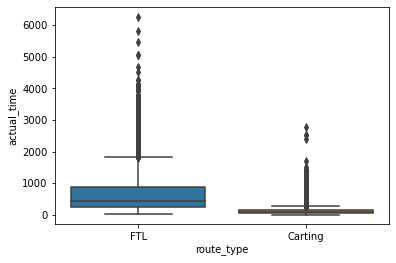

AxesSubplot(0.125,0.125;0.775x0.755)


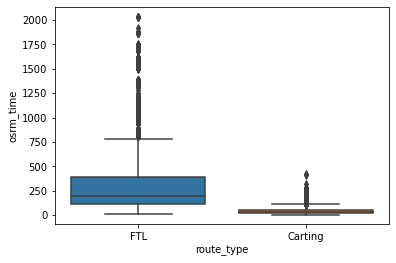

AxesSubplot(0.125,0.125;0.775x0.755)


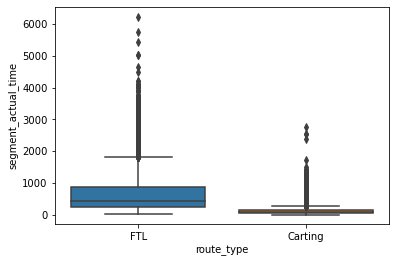

AxesSubplot(0.125,0.125;0.775x0.755)


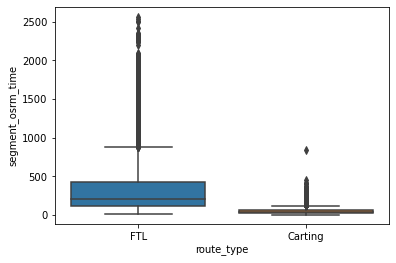

AxesSubplot(0.125,0.125;0.775x0.755)


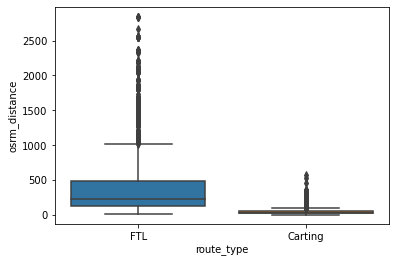

AxesSubplot(0.125,0.125;0.775x0.755)


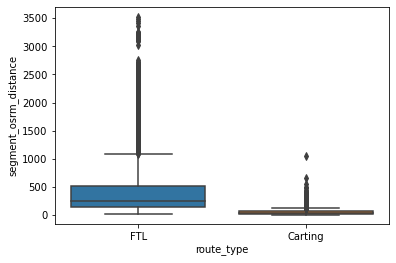

AxesSubplot(0.125,0.125;0.775x0.755)


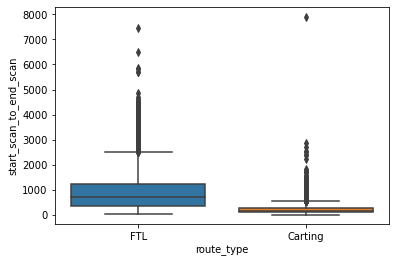

AxesSubplot(0.125,0.125;0.775x0.755)


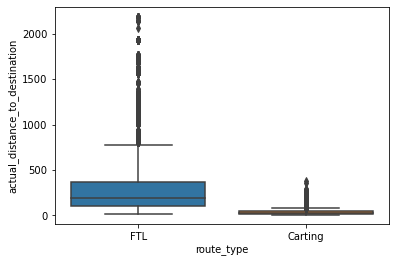

AxesSubplot(0.125,0.125;0.775x0.755)


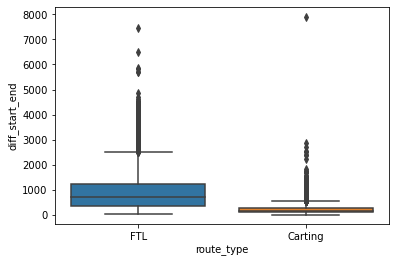

In [34]:
for col in cols:
    print(sns.boxplot(data['route_type'],data[col]))
    plt.show()

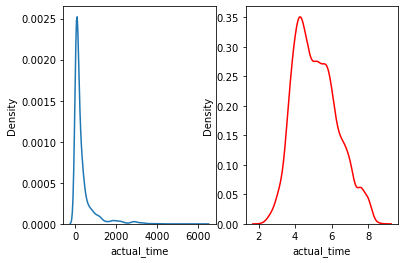

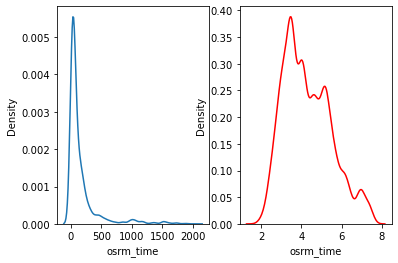

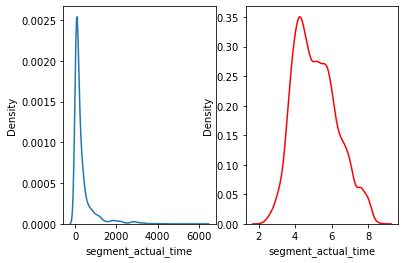

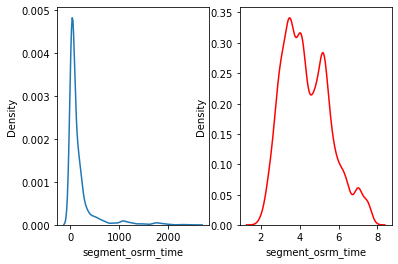

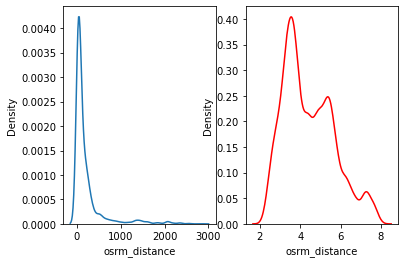

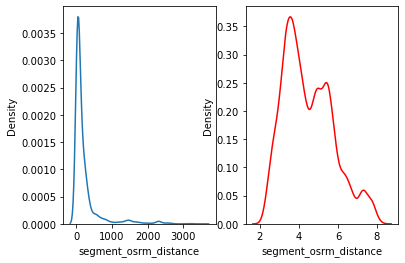

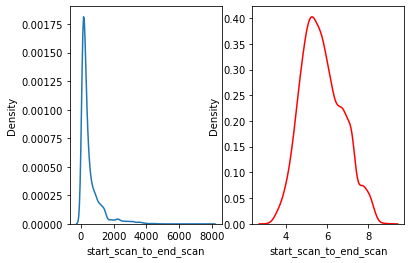

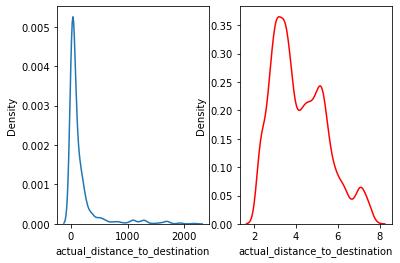

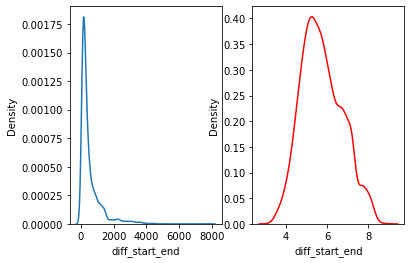

In [35]:
for col in cols:
    
    plt.subplot(121)
    sns.distplot(data[col],hist=False)
    
    plt.subplot(122)
    
    sns.distplot(data[col].apply(lambda x : np.log(x)),kde=True,hist=False,color='r')
    plt.show()

#### Insight

- Almost every variable follows log-normal distribution

In [36]:
data['trip_day'].value_counts()

18    791
15    783
13    750
12    747
22    740
21    740
17    722
14    712
20    704
25    697
26    685
19    676
24    660
27    652
23    631
3     631
16    616
28    608
29    607
1     605
2     552
30    508
Name: trip_day, dtype: int64

In [37]:
data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day
0,trip-153671041653548748,1562.0,717.0,1548.0,1008.0,991.3523,1320.4733,FTL,2259.0,824.732854,2260.11,Uttar Pradesh,Uttar Pradesh,2018,9,12
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.1894,Carting,180.0,73.186911,181.61,Karnataka,Karnataka,2018,9,12
2,trip-153671043369099517,3347.0,1740.0,3308.0,1941.0,2354.0665,2545.2678,FTL,3933.0,1927.404273,3934.36,Haryana,Haryana,2018,9,12
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.8766,Carting,100.0,17.175274,100.49,Maharashtra,Maharashtra,2018,9,12
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.7919,FTL,717.0,127.448500,718.34,Karnataka,Karnataka,2018,9,12


In [38]:
#creating bins based on the day of month the trip occured
bins = [1,10,20,31]
group = ['start','middle','end']
data["part_of_month"] = pd.cut(data["trip_day"],bins,labels=group)

In [39]:
data["part_of_month"].value_counts()

end       6528
middle    6501
start     1183
Name: part_of_month, dtype: int64

### Insight

- we see that maximum number of trips occured in the end of the month

## actual_time vs osrm_time

## Hypothesis Testing for actual_time and osrm_time

This is to infer if there is any significant difference between the actual_time and osrm_time(An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time)

#### H0 : 

There is no significant difference between actual_time and osrm_time

#### H1 :

There is significant difference between actual_time and osrm_time

#### significance level (alpha = 0.95)

In [40]:
from scipy.stats import ttest_ind

In [41]:

ttest_ind(data['actual_time'],data['osrm_time'])

Ttest_indResult(statistic=38.215453905833165, pvalue=0.0)

- Since p-value is almost 0 we can conclude that there is significant difference between actual_time and osrm_time


- Let's see which is greater

In [42]:
# H0 : actual_time > osrm_time
# H1 : actual_time < osrm_time
ttest_ind(data['actual_time'],data['osrm_time'],alternative = 'less')

Ttest_indResult(statistic=38.215453905833165, pvalue=1.0)

#### Insight

- Since p-value is greater than alpha we fail to reject null hypothesis and conculde that the mean of actual_time is greater than the mean of osrm_time

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

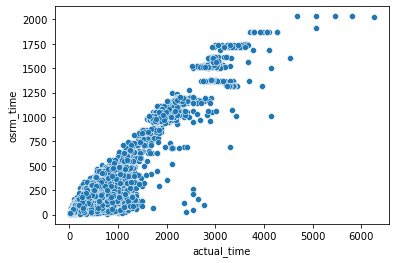

In [43]:
sns.scatterplot(data['actual_time'],data['osrm_time'])

## actual_time  and segment actual time 

### Hypothesis Testing for actual_time and segment_actual_time

This is to infer if there is any significant difference between the actual_time and segment_actual_time

#### H0 : 

There is no significant difference between actual_time and segment_actual_time

#### H1 :

There is significant difference between actual_time and segment_actual_time

#### significance level (alpha = 0.95)

In [44]:
ttest_ind(data['actual_time'],data['segment_actual_time'])

Ttest_indResult(statistic=0.5008024728897531, pvalue=0.6165138648224772)

#### Insight

- Since p-value is greater than alpha we fail to regject null hypothesis and conclude that there is no significant difference between actual_time and segment_actual_time

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

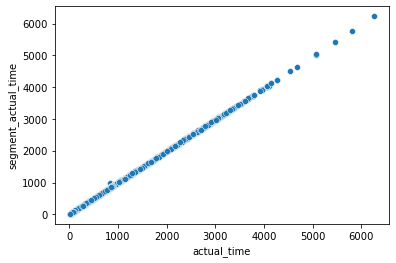

In [45]:
sns.scatterplot(data['actual_time'],data['segment_actual_time'])

## osrm distance and segment osrm distance

### Hypothesis Testing for osrm_distance and segment_osrm_distance

This is to infer if there is any significant difference between the osrm_distance and segment_osrm_distance

#### H0 : 

There is no significant difference between osrm_distance and segment_osrm_distance

#### H1 :

There is significant difference between osrm_distance and segment_osrm_distance

#### significance level (alpha = 0.95)

In [46]:
ttest_ind(data['osrm_distance'],data['segment_osrm_distance'])

Ttest_indResult(statistic=-4.117367046483823, pvalue=3.842631473353718e-05)

#### Insight

- Since p-value is less than alpha we reject null hypothesis and conclude that there is a significant difference in the means of osrm_distance and segment_osrm_distance

In [47]:
# H0 : osrm_distance > segment_osrm_distance
# H1 : osrm_distance =< segment_osrm_distance
ttest_ind(data['osrm_distance'],data['segment_osrm_distance'],alternative = 'less')

Ttest_indResult(statistic=-4.117367046483823, pvalue=1.921315736676859e-05)

- Since p-value is less than alpha we reject null hypothesis and conclude that segment_osrm_distance is greater than the osrm_distance 

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

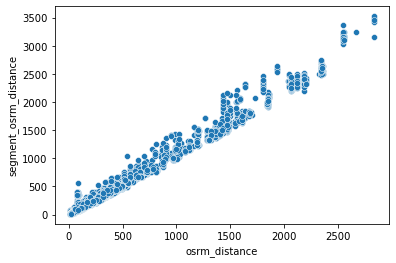

In [48]:
sns.scatterplot(data['osrm_distance'],data['segment_osrm_distance'])

## osrm time and segment osrm time 

### Hypothesis Testing for osrm_time and segment_osrm_time

This is to infer if there is any significant difference between the osrm_time and segment_osrm_time

#### H0 : 

There is no significant difference between osrm_time and segment_osrm_time

#### H1 :

There is significant difference between osrm_time and segment_osrm_time

#### significance level (alpha = 0.95)

In [49]:
ttest_ind(data['osrm_time'],data['segment_osrm_time'])

Ttest_indResult(statistic=-5.733106696963521, pvalue=9.956426798219171e-09)

#### Insight

- Since p-value is less than alpha we reject null hypothesis and conclude that there is a significant difference in the means of osrm_time and segment_osrm_time

In [50]:
# H0 : osrm_time > segment_osrm_time
# H1 : osrm_time =< segment_osrm_time
ttest_ind(data['osrm_time'],data['segment_osrm_time'],alternative = 'less')

Ttest_indResult(statistic=-5.733106696963521, pvalue=4.978213399109586e-09)

- Since p-value is less than alpha we reject null hypothesis and conclude that segment_osrm_time is greater than the osrm_time

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

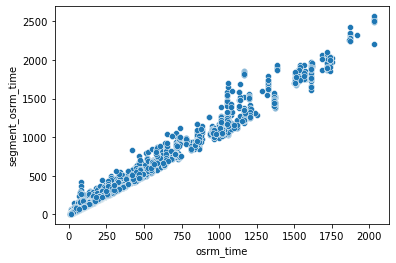

In [51]:
sns.scatterplot(data['osrm_time'],data['segment_osrm_time'])

## start_scan_to_end_scan vs diff_start_end

- start_scan_to_end_scan is the total time taken for a product to reach its final destination from the initial source and diff_start_end is the calculated time by aggregating the duration of various destinations from initila source to final destination

### Hypothesis Testing for start_scan_to_end_scan and diff_start_end

This is to infer if there is any significant difference between the start_scan_to_end_scan and diff_start_end

#### H0 : 

There is no significant difference between start_scan_to_end_scan and diff_start_end

#### H1 :

There is significant difference between start_scan_to_end_scan and diff_start_end

#### significance level (alpha = 0.95)

In [52]:
ttest_ind(data['start_scan_to_end_scan'],data['diff_start_end'])

Ttest_indResult(statistic=-0.11598577555478516, pvalue=0.9076646011346594)

### Insight

- Since p-value is greater than alpha we fail to reject null hypothesis and conclude that there is no significant difference in the total time as per the scanned records and the calulated time by aggregating the time between various destinations

In [53]:
data['start_scan_to_end_scan']

0        2259.0
1         180.0
2        3933.0
3         100.0
4         717.0
          ...  
14812     257.0
14813      60.0
14814     421.0
14815     347.0
14816     353.0
Name: start_scan_to_end_scan, Length: 14817, dtype: float64

In [54]:
data['diff_start_end']

0        2260.11
1         181.61
2        3934.36
3         100.49
4         718.34
          ...   
14812     258.03
14813      60.59
14814     422.12
14815     348.52
14816     354.40
Name: diff_start_end, Length: 14817, dtype: float64

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='diff_start_end'>

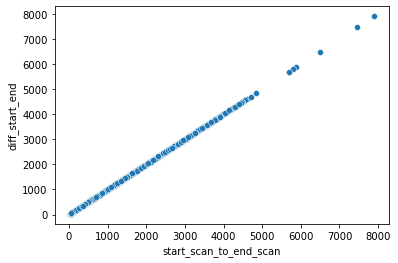

In [55]:
sns.scatterplot(data['start_scan_to_end_scan'],data['diff_start_end'])

## Outlier Treatment

In [56]:
cols = ['actual_time','osrm_time','segment_actual_time','segment_osrm_time','osrm_distance',
         'segment_osrm_distance','start_scan_to_end_scan','actual_distance_to_destination',
         'diff_start_end']

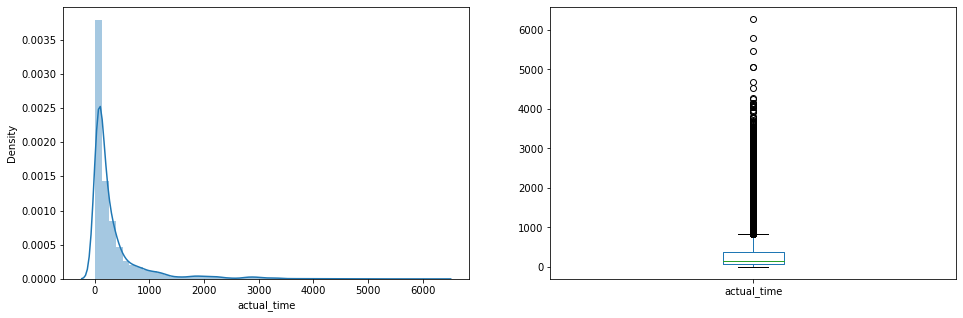

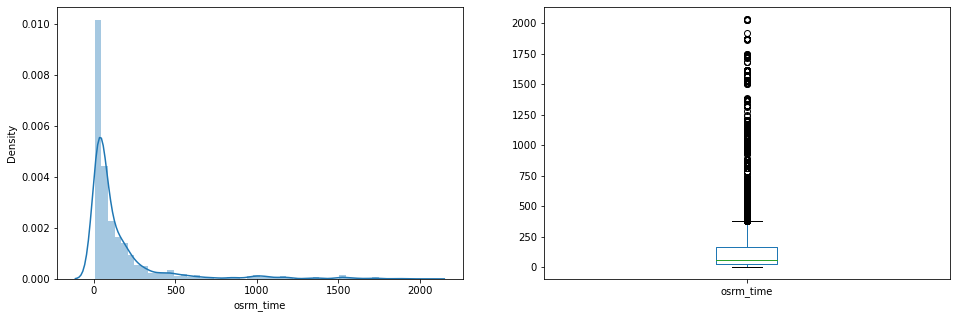

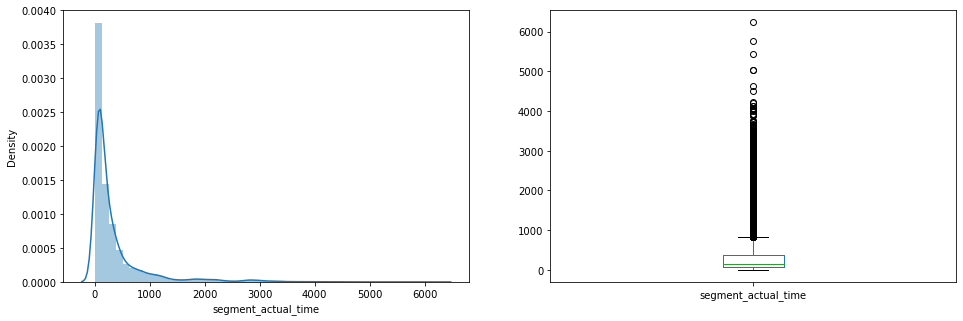

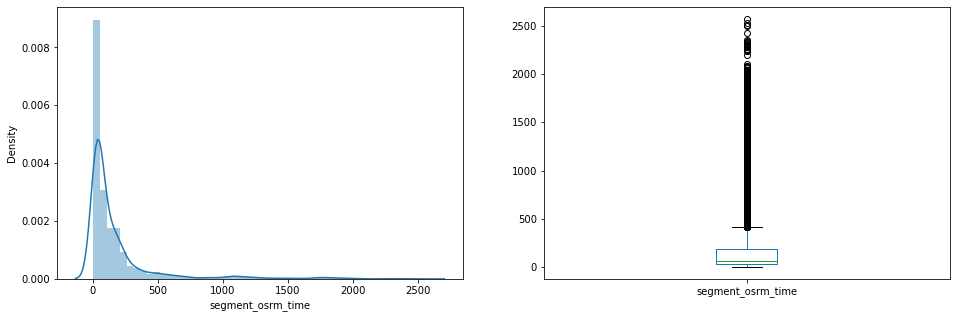

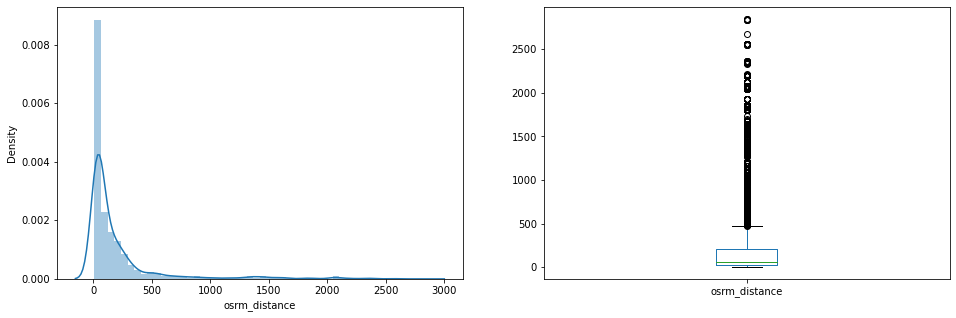

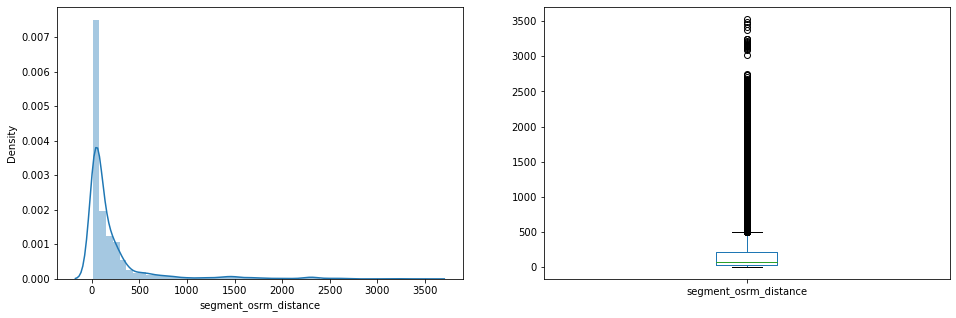

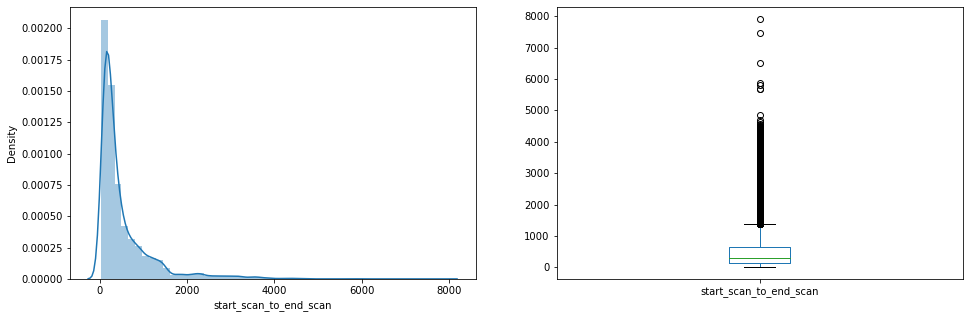

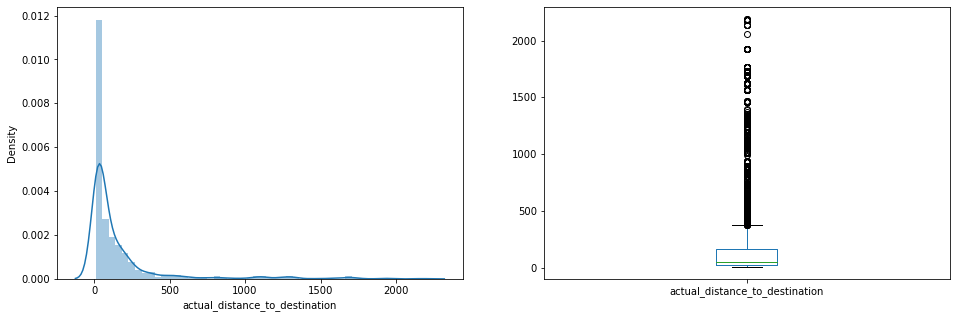

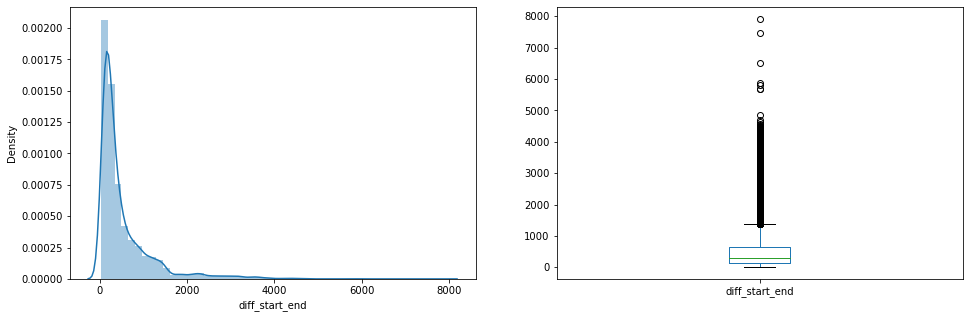

In [57]:
for col in cols:
    
    plt.subplot(121)
    
    sns.distplot(data[col])

    plt.subplot(122)
    data[col].plot.box(figsize=(16,5))
    plt.show()

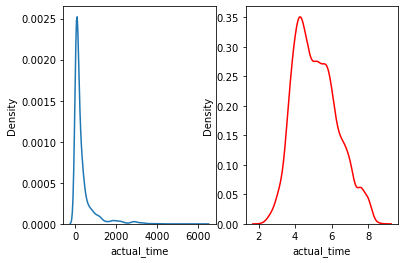

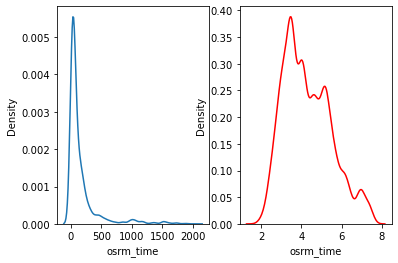

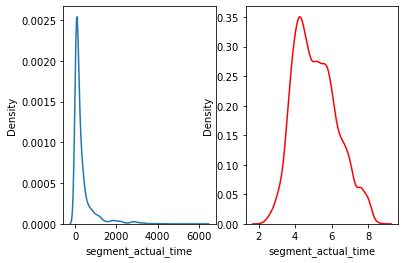

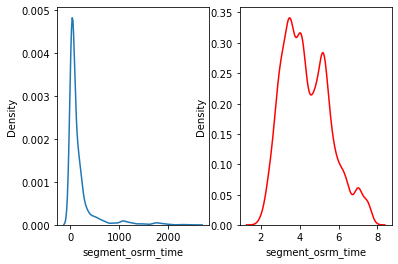

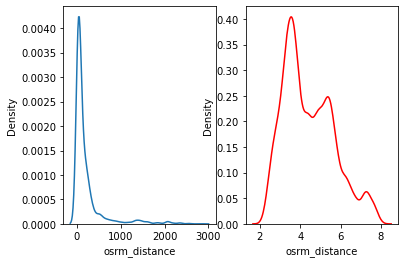

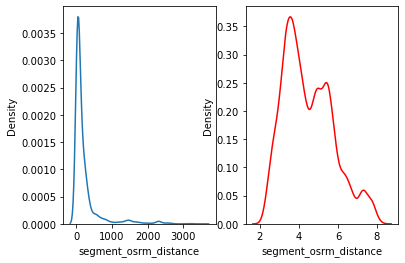

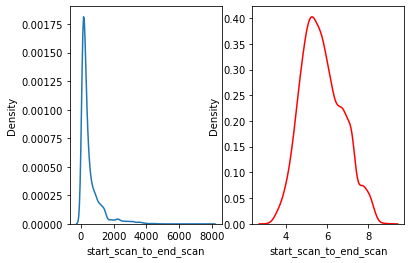

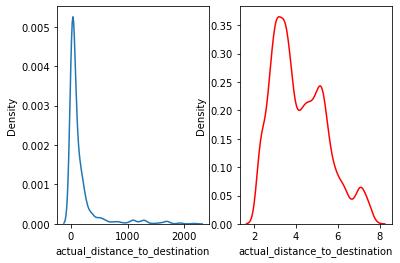

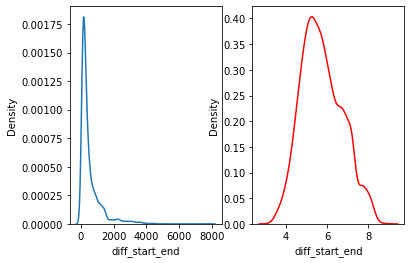

In [58]:
for col in cols:
    
    plt.subplot(121)
    sns.distplot(data[col],hist=False)
    
    plt.subplot(122)
    
    sns.distplot(data[col].apply(lambda x : np.log(x)),kde=True,hist=False,color='r')
    plt.show()

In [59]:
from numpy import percentile
for col in cols:
    q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data[col] if x < lower or x > upper]
    print(f'The percentage of outliers in {col} is {len(outliers)/len(data[col])}')
    

The percentage of outliers in actual_time is 0.11088614429371668
The percentage of outliers in osrm_time is 0.10238239859620706
The percentage of outliers in segment_actual_time is 0.11088614429371668
The percentage of outliers in segment_osrm_time is 0.1006951474657488
The percentage of outliers in osrm_distance is 0.10285482891273537
The percentage of outliers in segment_osrm_distance is 0.10447458999797529
The percentage of outliers in start_scan_to_end_scan is 0.08550988729162448
The percentage of outliers in actual_distance_to_destination is 0.0977930755213606
The percentage of outliers in diff_start_end is 0.08544239724640615


- If we drop the outliers we end up loosing lot of useful information. For example if we have an outlier in actual_time then we have to delete the entire row corresponding to that value. But all the other values in that row might not be outliers. Thus we end up loosing a lot of useful information.


- so instead of dropping the outliers we replace them with q25 - cut_off, q75 + cut_off where q25,q75 are 25th percentile and 75th percentile values respectively

In [60]:
# replacing all the outliers with q25 - cut_off, q75 + cut_off where cutoff = 1.5*iqr
for col in cols:
        q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        data[col] = data[col].apply(lambda x : lower if x < lower else upper if x > upper else x)
    

In [61]:
data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day,part_of_month
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Uttar Pradesh,Uttar Pradesh,2018,9,12,middle
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,Carting,180.0,73.186911,181.610,Karnataka,Karnataka,2018,9,12,middle
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Haryana,Haryana,2018,9,12,middle
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,Carting,100.0,17.175274,100.490,Maharashtra,Maharashtra,2018,9,12,middle
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,FTL,717.0,127.448500,718.340,Karnataka,Karnataka,2018,9,12,middle


## Relationship among different features

In [62]:
rel = data[['actual_time','osrm_time','segment_actual_time','segment_osrm_time','osrm_distance',
         'segment_osrm_distance','start_scan_to_end_scan','actual_distance_to_destination',
         'diff_start_end']]

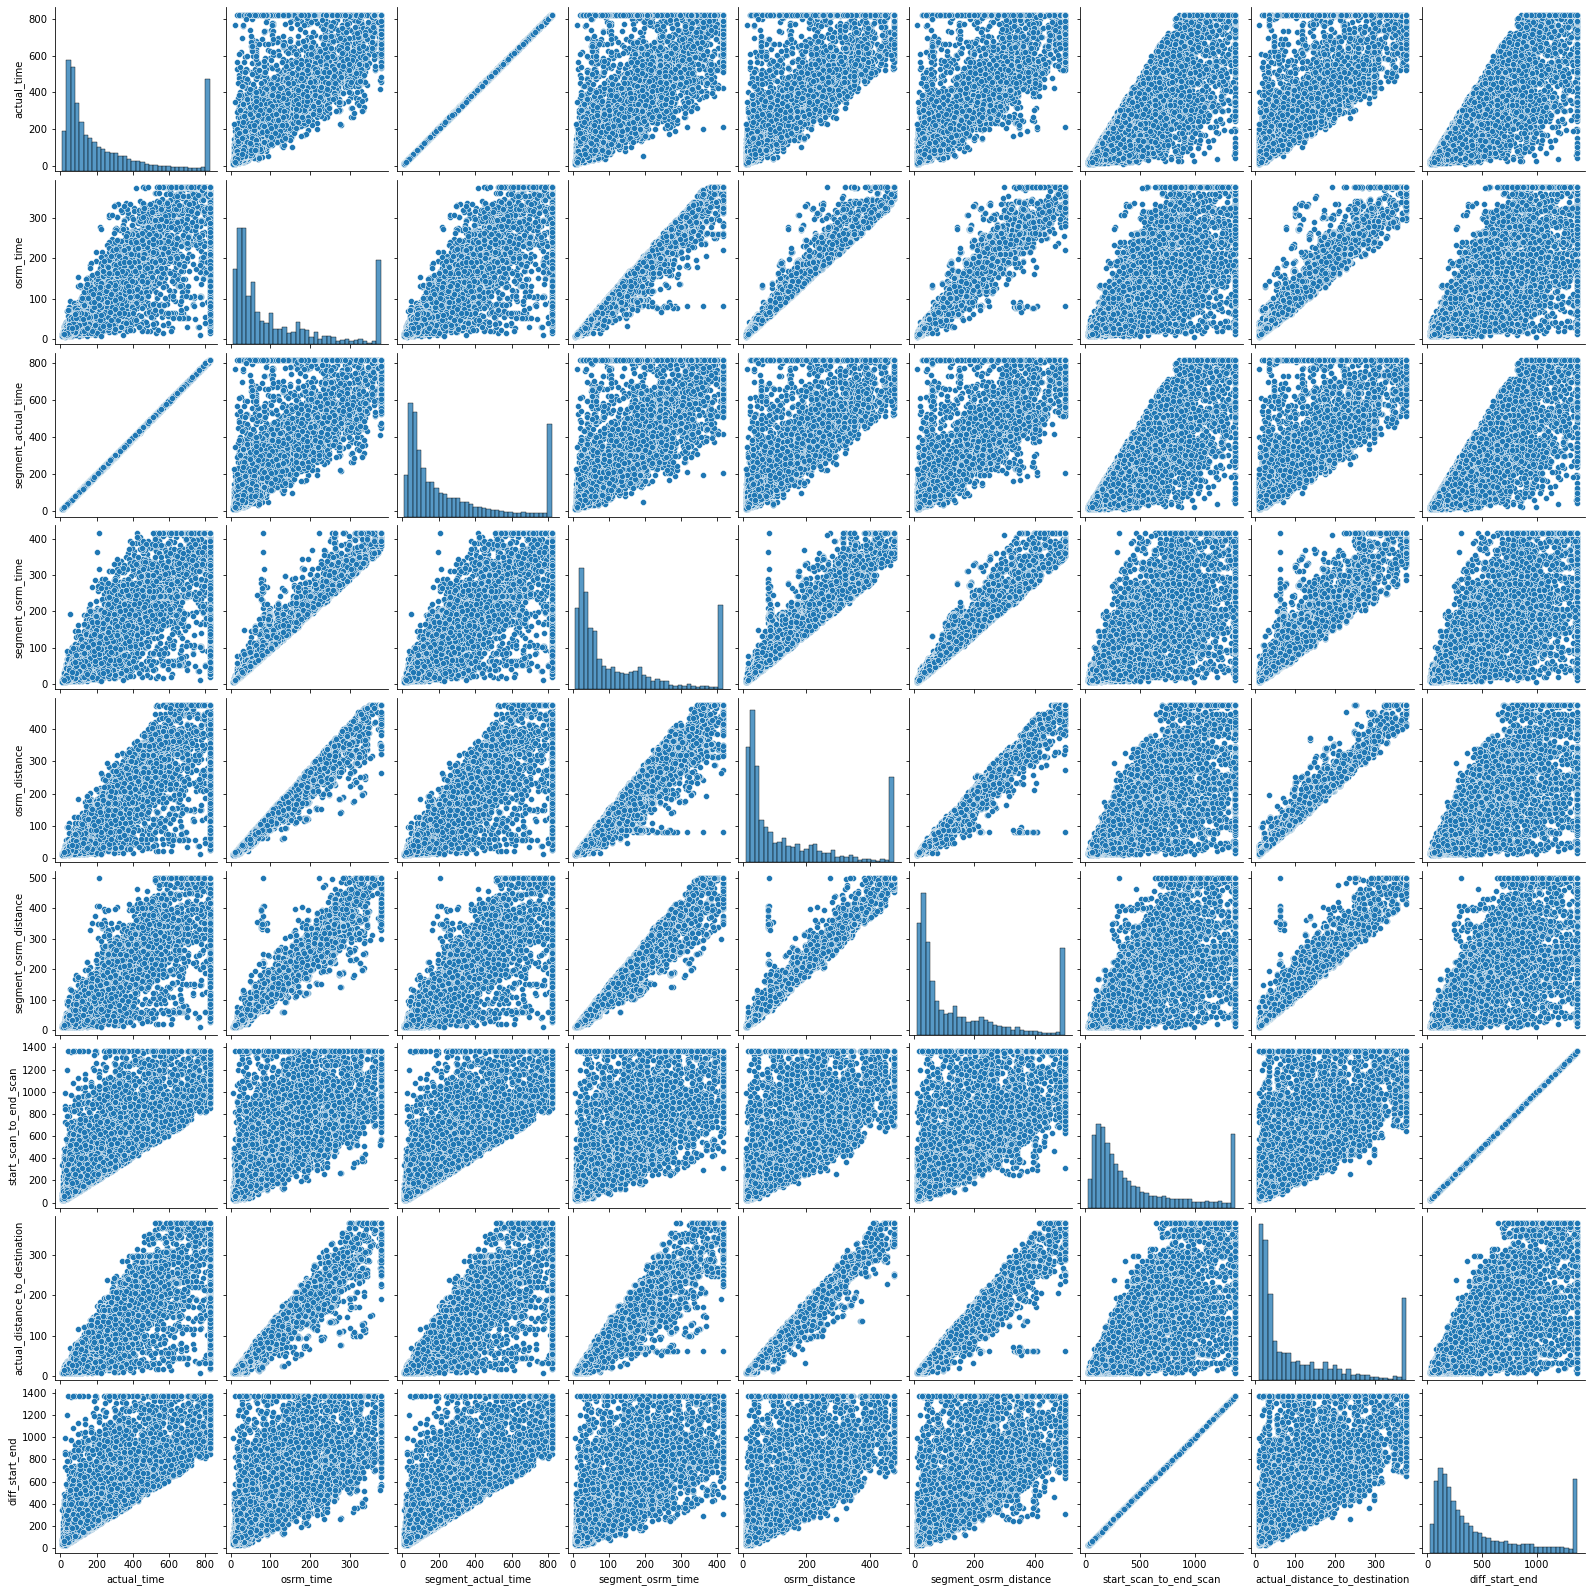

In [63]:
sns.pairplot(rel)

<AxesSubplot:>

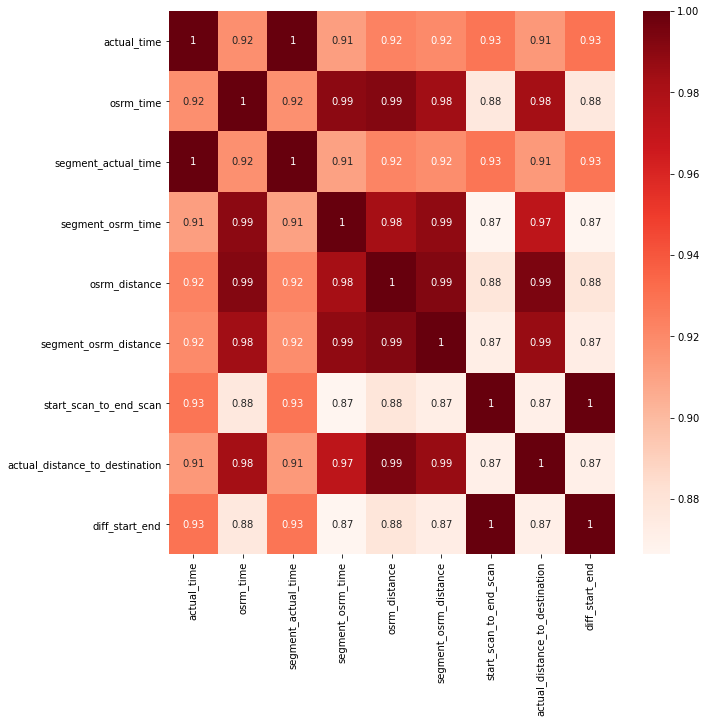

In [64]:
plt.figure(figsize = (10,10))
sns.heatmap(rel.corr(),cmap="Reds", annot=True)

##  A very huge multi-collinearity exists in the data

In [65]:
data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day,part_of_month
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Uttar Pradesh,Uttar Pradesh,2018,9,12,middle
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,Carting,180.0,73.186911,181.610,Karnataka,Karnataka,2018,9,12,middle
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Haryana,Haryana,2018,9,12,middle
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,Carting,100.0,17.175274,100.490,Maharashtra,Maharashtra,2018,9,12,middle
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,FTL,717.0,127.448500,718.340,Karnataka,Karnataka,2018,9,12,middle


## Handling categorical variables

- we have 3 categorical variables. route_type,destination_state,source_state

In [66]:
data['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [67]:
final_data = data.copy()

In [68]:
final_data['route_type'] = final_data['route_type'].apply(lambda x: 1 if x == 'Carting' else 0)

In [69]:
final_data['route_type'].value_counts()

1    8908
0    5909
Name: route_type, dtype: int64

In [70]:
final_data['destination_state'].value_counts()

Maharashtra               2561
Karnataka                 2295
Haryana                   1643
Tamil Nadu                1084
Uttar Pradesh              819
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      653
Punjab                     617
Rajasthan                  550
Andhra Pradesh             442
Bihar                      367
Madhya Pradesh             358
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Daman & Diu                  1
Tripura                      1
Name: destination_state, dtype: int64

In [71]:
#ignoring categories with frequency less than 300 and creating dummies  for n-1 variables
k = final_data['destination_state'].value_counts()
k = k.index[k>300][:-1]
for i in k:
    name = 'destination'+'_'+i
    final_data[name] = (final_data['destination_state'] == i).astype(int)

In [72]:
final_data['source_state'].value_counts()

Maharashtra               2714
Karnataka                 2143
Haryana                   1838
Tamil Nadu                1039
Telangana                  785
Uttar Pradesh              762
Gujarat                    750
Delhi                      728
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             435
Bihar                      351
Madhya Pradesh             317
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Mizoram                      4
Arunachal Pradesh            4
Name: source_state, dtype: int64

In [73]:
#ignoring categories with frequency less than 300 and creating dummies  for n-1 variables
k = final_data['source_state'].value_counts()
k = k.index[k>300][:-1]
for i in k:
    name = 'source'+'_'+i
    final_data[name] = (final_data['source_state'] == i).astype(int)

In [74]:
final_data.drop(['destination_state','source_state'],axis=1,inplace=True)

In [75]:
final_data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,trip_year,trip_month,trip_day,part_of_month,destination_Maharashtra,destination_Karnataka,destination_Haryana,destination_Tamil Nadu,destination_Uttar Pradesh,destination_Telangana,destination_Gujarat,destination_West Bengal,destination_Delhi,destination_Punjab,destination_Rajasthan,destination_Andhra Pradesh,destination_Bihar,source_Maharashtra,source_Karnataka,source_Haryana,source_Tamil Nadu,source_Telangana,source_Uttar Pradesh,source_Gujarat,source_Delhi,source_West Bengal,source_Punjab,source_Rajasthan,source_Andhra Pradesh,source_Bihar
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,2018,9,12,middle,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,1,180.0,73.186911,181.610,2018,9,12,middle,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,2018,9,12,middle,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,1,100.0,17.175274,100.490,2018,9,12,middle,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,0,717.0,127.448500,718.340,2018,9,12,middle,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [76]:
final_data['trip_month'].value_counts()

9     13029
10     1788
Name: trip_month, dtype: int64

- since all orders happened in the same year (2018) we ignore that. 


- Also there are various days on which a delivery has happened, let's ignore this too and create dummy variable for just month

In [77]:
final_data['trip_month'] = final_data['trip_month'].apply(lambda x : 1 if x == 9 else 0)

In [78]:
final_data.drop(['trip_day','trip_year'],axis=1,inplace=True)

In [79]:
final_data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,trip_month,part_of_month,destination_Maharashtra,destination_Karnataka,destination_Haryana,destination_Tamil Nadu,destination_Uttar Pradesh,destination_Telangana,destination_Gujarat,destination_West Bengal,destination_Delhi,destination_Punjab,destination_Rajasthan,destination_Andhra Pradesh,destination_Bihar,source_Maharashtra,source_Karnataka,source_Haryana,source_Tamil Nadu,source_Telangana,source_Uttar Pradesh,source_Gujarat,source_Delhi,source_West Bengal,source_Punjab,source_Rajasthan,source_Andhra Pradesh,source_Bihar
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,1,middle,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,1,180.0,73.186911,181.610,1,middle,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,1,middle,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,1,100.0,17.175274,100.490,1,middle,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,0,717.0,127.448500,718.340,1,middle,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# creating dummy variables for categories in part_of_month
k = final_data['part_of_month'].value_counts()
k = k.index[:-1]
for i in k:
    name = 'month'+'_'+i
    final_data[name] = (final_data['part_of_month'] == i).astype(int)

In [81]:
final_data.drop(['part_of_month'],axis=1,inplace=True)

In [82]:
final_data.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,trip_month,destination_Maharashtra,destination_Karnataka,destination_Haryana,destination_Tamil Nadu,destination_Uttar Pradesh,destination_Telangana,destination_Gujarat,destination_West Bengal,destination_Delhi,destination_Punjab,destination_Rajasthan,destination_Andhra Pradesh,destination_Bihar,source_Maharashtra,source_Karnataka,source_Haryana,source_Tamil Nadu,source_Telangana,source_Uttar Pradesh,source_Gujarat,source_Delhi,source_West Bengal,source_Punjab,source_Rajasthan,source_Andhra Pradesh,source_Bihar,month_end,month_middle
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,1,180.0,73.186911,181.610,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,0,1369.0,377.202161,1370.605,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,1,100.0,17.175274,100.490,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,0,717.0,127.448500,718.340,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Top States based on the no.of orders

In [83]:
top_states = pd.DataFrame(data['destination_state'].value_counts()[0:7])

In [84]:
top_states = top_states.reset_index()

In [85]:
top_states 

,index,destination_state
0,Maharashtra,2561
1,Karnataka,2295
2,Haryana,1643
3,Tamil Nadu,1084
4,Uttar Pradesh,819
5,Telangana,784
6,Gujarat,734


Text(0.5, 1.0, 'Top 7 states based on the number of orders')

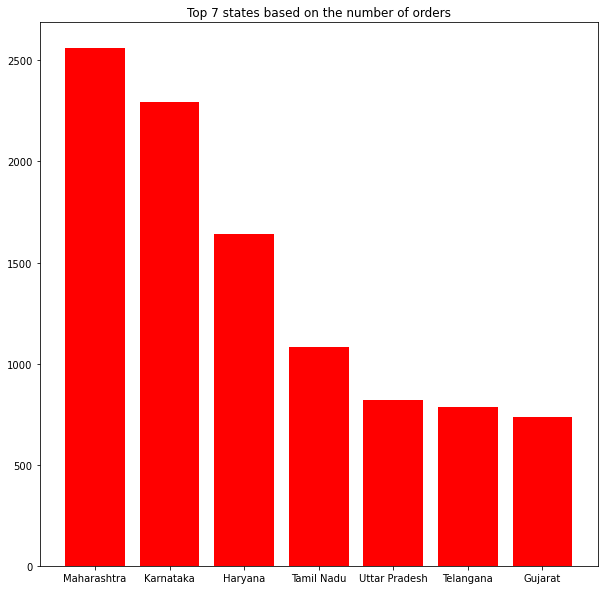

In [86]:
plt.figure(figsize=(10,10)) 
plt.bar(data=top_states,height = 'destination_state',x='index',color = 'r')
plt.title('Top 7 states based on the number of orders')

#### Insight

- we see that the maximum number of orders came from Maharahtra followed by Karnataka and Haryana

### Busiest Corridor

- we define the busiest corridor as those two states where there are maximum number of trips.(ignoring the interstate trips)

In [87]:
df = data.copy()

In [88]:
df['col_for_count'] = '#'

In [89]:
df.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,destination_state,source_state,trip_year,trip_month,trip_day,part_of_month,col_for_count
0,trip-153671041653548748,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Uttar Pradesh,Uttar Pradesh,2018,9,12,middle,#
1,trip-153671042288605164,143.0,68.0,141.0,65.0,85.1110,84.18940,Carting,180.0,73.186911,181.610,Karnataka,Karnataka,2018,9,12,middle,#
2,trip-153671043369099517,824.5,376.5,818.5,416.0,474.9587,498.02425,FTL,1369.0,377.202161,1370.605,Haryana,Haryana,2018,9,12,middle,#
3,trip-153671046011330457,59.0,15.0,59.0,16.0,19.6800,19.87660,Carting,100.0,17.175274,100.490,Maharashtra,Maharashtra,2018,9,12,middle,#
4,trip-153671052974046625,341.0,117.0,340.0,115.0,146.7918,146.79190,FTL,717.0,127.448500,718.340,Karnataka,Karnataka,2018,9,12,middle,#


In [90]:
busiest = df.groupby(['destination_state','source_state']).agg({'col_for_count':'count',
                                                               'actual_distance_to_destination':'mean',
                                                               'start_scan_to_end_scan':'mean'})

In [91]:
busiest.shape

(141, 3)

In [92]:
busiest = busiest.sort_values('col_for_count',ascending=False)

In [93]:
busiest = busiest.reset_index()

In [94]:
busiest_corridor = busiest[busiest['destination_state'] != busiest['source_state']]

In [95]:
busiest_corridor[0:10] 

,destination_state,source_state,col_for_count,actual_distance_to_destination,start_scan_to_end_scan
11,Haryana,Delhi,387,41.352234,240.178295
13,Delhi,Haryana,312,46.689946,244.692308
19,Uttar Pradesh,Haryana,121,178.470476,669.206612
21,Punjab,Haryana,97,174.226654,607.711340
23,Uttar Pradesh,Delhi,93,189.252458,628.505376
24,Rajasthan,Haryana,83,181.684255,499.530120
25,Punjab,Chandigarh,74,49.557398,309.189189
26,Delhi,Uttar Pradesh,72,92.448129,385.041667
27,Haryana,Uttar Pradesh,60,134.516134,492.716667
28,Karnataka,Maharashtra,54,354.023067,1252.370370


- We can conclude that Haryana - Delhi is the busiest corridor, followed by Delhi - Uttar Pradesh


## Standardization

In [96]:
X = final_data.drop('trip_uuid',axis=1)

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(X)


In [98]:
std_data = pd.DataFrame(std_data, columns=X.columns)
std_data.head()

,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,route_type,start_scan_to_end_scan,actual_distance_to_destination,diff_start_end,trip_month,destination_Maharashtra,destination_Karnataka,destination_Haryana,destination_Tamil Nadu,destination_Uttar Pradesh,destination_Telangana,destination_Gujarat,destination_West Bengal,destination_Delhi,destination_Punjab,destination_Rajasthan,destination_Andhra Pradesh,destination_Bihar,source_Maharashtra,source_Karnataka,source_Haryana,source_Tamil Nadu,source_Telangana,source_Uttar Pradesh,source_Gujarat,source_Delhi,source_West Bengal,source_Punjab,source_Rajasthan,source_Andhra Pradesh,source_Bihar,month_end,month_middle
0,2.148616,2.249470,2.149256,2.256743,2.277563,2.262408,-1.227815,2.233897,2.284299,2.233567,0.370449,-0.457120,-0.428109,-0.353151,-0.280952,4.134196,-0.236365,-0.228297,-0.222177,-0.214716,-0.208448,-0.196343,-0.175351,-0.159367,-0.473542,-0.411201,-0.376316,-0.274609,-0.236524,4.294751,-0.230903,-0.227314,-0.216771,-0.193733,-0.189569,-0.173914,-0.155768,-0.88744,1.131012
1,-0.463140,-0.403038,-0.465311,-0.475861,-0.361545,-0.404369,0.814455,-0.667044,-0.305588,-0.664809,0.370449,-0.457120,2.335853,-0.353151,-0.280952,-0.241885,-0.236365,-0.228297,-0.222177,-0.214716,-0.208448,-0.196343,-0.175351,-0.159367,-0.473542,2.431900,-0.376316,-0.274609,-0.236524,-0.232842,-0.230903,-0.227314,-0.216771,-0.193733,-0.189569,-0.173914,-0.155768,-0.88744,1.131012
2,2.148616,2.249470,2.149256,2.256743,2.277563,2.262408,-1.227815,2.233897,2.284299,2.233567,0.370449,-0.457120,-0.428109,2.831653,-0.280952,-0.241885,-0.236365,-0.228297,-0.222177,-0.214716,-0.208448,-0.196343,-0.175351,-0.159367,-0.473542,-0.411201,2.657345,-0.274609,-0.236524,-0.232842,-0.230903,-0.227314,-0.216771,-0.193733,-0.189569,-0.173914,-0.155768,-0.88744,1.131012
3,-0.785059,-0.858737,-0.781760,-0.857336,-0.804486,-0.818804,0.814455,-0.862229,-0.782748,-0.862553,0.370449,2.187608,-0.428109,-0.353151,-0.280952,-0.241885,-0.236365,-0.228297,-0.222177,-0.214716,-0.208448,-0.196343,-0.175351,-0.159367,2.111746,-0.411201,-0.376316,-0.274609,-0.236524,-0.232842,-0.230903,-0.227314,-0.216771,-0.193733,-0.189569,-0.173914,-0.155768,-0.88744,1.131012
4,0.295668,0.018268,0.302658,-0.086601,0.056009,-0.000954,-1.227815,0.643137,0.156663,0.643561,0.370449,-0.457120,2.335853,-0.353151,-0.280952,-0.241885,-0.236365,-0.228297,-0.222177,-0.214716,-0.208448,-0.196343,-0.175351,-0.159367,-0.473542,2.431900,-0.376316,-0.274609,-0.236524,-0.232842,-0.230903,-0.227314,-0.216771,-0.193733,-0.189569,-0.173914,-0.155768,-0.88744,1.131012


# Insights

* There is significant difference between actual_time and osrm_time and the mean of actual_time is greater than the mean of osrm_time


* There is no significant difference between actual_time and segment_actual_time


* There is a significant difference in the means of osrm_distance and segment_osrm_distance and segment_osrm_distance is greater than the osrm_distance


* There is a significant difference in the means of osrm_time and segment_osrm_time and segment_osrm_time is greater than the osrm_time.


*  There is no significant difference in the total time as per the scanned records and the calulated time by aggregating the time between various destinations


* we see that maximum number of trips occured in the end of the month


* we see that the maximum number of orders came from Maharahtra followed by Karnataka and Haryana


* We can conclude that Haryana - Delhi is the busiest corridor, followed by Delhi - Uttar Pradesh

# Recommendations

* Since Haryana is the busiest corridor we can optimize warehouse management for maximum productivity


* Since majority of orders came from Maharastra we can study the behaviour patterns of these orders to provide better supply chain solutions at the lowest costs


* we can have further data on expected delivery date and compare it with the product reaching destination date and study the reasons behind the delay in the delivery for the delayed deliveries and thus enhance customer experience.


* Since there is a significant difference in the actual_time and osrm_time(An open*source routing engine time calculator which computes the shortest path between points in a given map) we can further study the reasons dehind this difference and try to minimoze it 


* we can further ask for the data the customer has received the order and calculate the gap between the customer receiving the order and the product being deliverd to the destination warehouse and check if the gap is huge. If the gap is huge we could further study the reasong behind late delivery although the product is shipped to the destination warehouse

